In [5]:
# Python 3.7.3
# Notebook for data preperation
# Any data that has an "ID" column and a "Text" column

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#loading the dataset
df = pd.read_csv('train.csv',encoding='latin-1')
print(df.head)

<bound method NDFrame.head of        ItemID  Sentiment                                      SentimentText
0           1          0                       is so sad for my APL frie...
1           2          0                     I missed the New Moon trail...
2           3          1                            omg its already 7:30 :O
3           4          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4           5          0           i think mi bf is cheating on me!!!   ...
...       ...        ...                                                ...
99984   99996          0  @Cupcake  seems like a repeating problem   hop...
99985   99997          1  @cupcake__ arrrr we both replied to each other...
99986   99998          0                     @CuPcAkE_2120 ya i thought so 
99987   99999          1  @Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988  100000          1                    @cupcake_kayla haha yes you do 

[99989 rows x 3 columns]>


In [6]:
# Reindex columns to order that Bert specifies on line 164 of run_classifier.py (this may change with differnet models)
df = df.drop(columns = ['ItemID'])
df = df.reindex(columns = ['SentimentText','Sentiment'])

print(df.head)

<bound method NDFrame.head of                                            SentimentText  Sentiment
0                           is so sad for my APL frie...          0
1                         I missed the New Moon trail...          0
2                                omg its already 7:30 :O          1
3                .. Omgaga. Im sooo  im gunna CRy. I'...          0
4               i think mi bf is cheating on me!!!   ...          0
...                                                  ...        ...
99984  @Cupcake  seems like a repeating problem   hop...          0
99985  @cupcake__ arrrr we both replied to each other...          1
99986                     @CuPcAkE_2120 ya i thought so           0
99987  @Cupcake_Dollie Yes. Yes. I'm glad you had mor...          1
99988                    @cupcake_kayla haha yes you do           1

[99989 rows x 2 columns]>


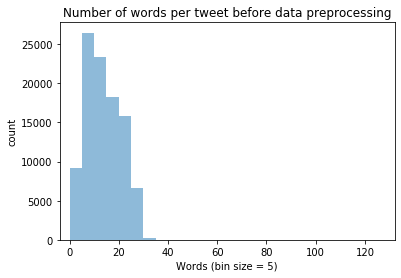

In [8]:
# find number of words per tweet before preprocessing
data = df['SentimentText'].str.split().str.len()
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])
plt.hist(data, bins=bins, alpha=0.5)
plt.title('Number of words per tweet before data preprocessing')
plt.xlabel('Words (bin size = 5)')
plt.ylabel('count')
plt.show()

In [9]:
#Convert from dataframe to series
string = df['SentimentText']

In [10]:
# from https://stackoverflow.com/questions/27195769/python-remove-word-start-with-specific-character
# and https://stackabuse.com/using-regex-for-text-manipulation-in-python/

# re is able to match/serach/finall and sub (substitute) values
# re searches for the '@' character and all other words in the following word (\w+) and substitues it with a blank

import re

for index, value in string.items():
    string[index] = re.sub(r'@\w+','', value)
    
print(string.head)

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<bound method NDFrame.head of 0                             is so sad for my APL frie...
1                           I missed the New Moon trail...
2                                  omg its already 7:30 :O
3                  .. Omgaga. Im sooo  im gunna CRy. I'...
4                 i think mi bf is cheating on me!!!   ...
                               ...                        
99984      seems like a repeating problem   hope you're...
99985     arrrr we both replied to each other over diff...
99986                                     ya i thought so 
99987        Yes. Yes. I'm glad you had more fun with me. 
99988                                     haha yes you do 
Name: SentimentText, Length: 99989, dtype: object>


In [11]:
# turn series back to dataframe

df['SentimentText'] = string

In [12]:
# from https://towardsdatascience.com/updated-text-preprocessing-techniques-for-sentiment-analysis-549af7fe412a
# https://towardsdatascience.com/why-you-should-avoid-removing-stopwords-aa7a353d2a52
# remove some (not all) stop words, this one is specifically meant for sentiment analysis

from nlppreprocess import NLP
import pandas as pd

nlp = NLP()
df['SentimentText'] = df['SentimentText'].apply(nlp.process)

In [13]:
# https://stackoverflow.com/questions/49984905/count-number-of-words-per-row

df['SentimentText'] = df['SentimentText'].str.strip('0123456789. #')

In [14]:
# drop rows with nan values in the 'SentimentText' column
df = df.dropna()

In [15]:
# Split the phrases into individual words
df['numwords'] = df['SentimentText'].str.split().str.len()

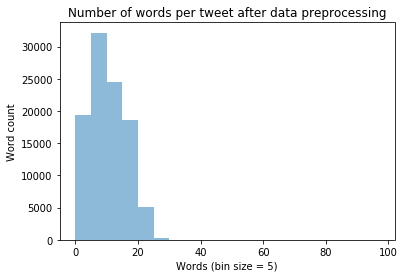

In [18]:
# plot the number of words per tweet after preprocessing
data = df['numwords']

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Number of words per tweet after data preprocessing')
plt.xlabel('Words (bin size = 5)')
plt.ylabel('Word count')

plt.show()

In [21]:
# Largest number of words in a tweet in the dataset
print(max(data))

97


In [10]:
# split and create train and validation dataset
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.33, random_state = 0)

print(df_train.size, df_test.size)

133984 65994


In [11]:
# the header and index options are based on the bert model found in 
# https://towardsdatascience.com/beginners-guide-to-bert-for-multi-classification-task-92f5445c2d7c

df_test.to_csv('test.tsv', sep = '\t',index=True, header=True )
df_train.to_csv('train.tsv', sep = '\t', index = True, header = True)